In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:
price = data['price'].values.reshape(-1,1)

In [4]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
'''scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'scaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

In [6]:
estim = 1000
rate = 0.009
depth = 3

In [7]:
model = GradientBoostingRegressor(n_estimators=estim, learning_rate=rate, max_depth=depth, random_state=42)

In [8]:

model.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,loss,'squared_error'
,learning_rate,0.009
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [9]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return np.mean((y - y_pred) ** 2)

In [10]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train:.4f}')

mse_test = evaluate_model(model, X_test, y_test)
print(f'Test MSE: {mse_test:.4f}')

Training MSE: 5486216493371.3154
Test MSE: 7054761889638.0283


In [11]:
y_test_pred = model.predict(X_test)

In [12]:
pltYTestPred = []
pltYTest = []
testChange = []

In [13]:
for i in range(len(y_test_pred)):
  pltYTestPred.append(y_test_pred[i])
  pltYTest.append(y_test[i][0])
  testChange.append(y_test_pred[i] - y_test[i][0])

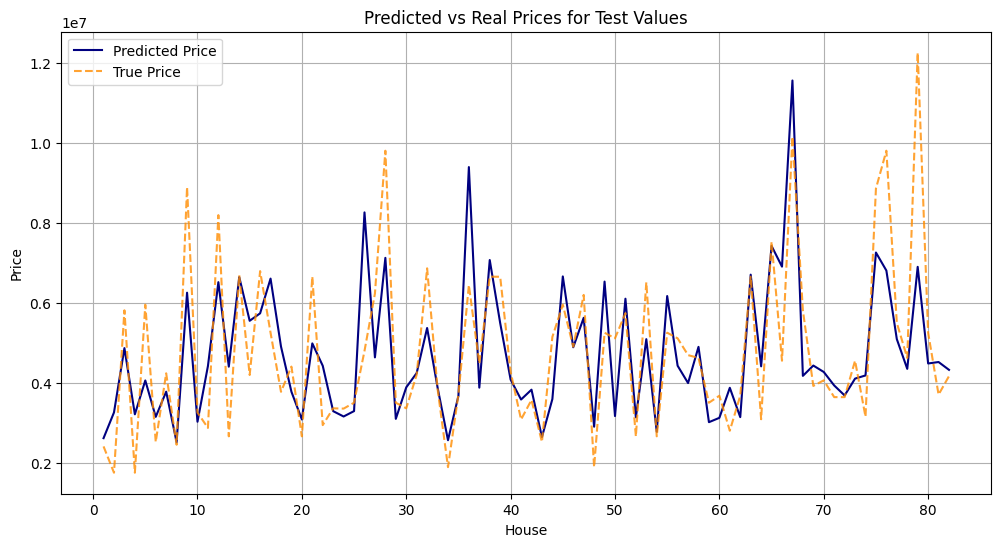

In [14]:
plt.figure(figsize=(12, 6))
plt.title("Predicted vs Real Prices for Test Values")
plt.xlabel("House")
plt.ylabel("Price")
testRange = range(1, len(pltYTestPred)+1)
plt.plot(testRange, pltYTestPred, label="Predicted Price", color="navy")

plt.plot(testRange, pltYTest, label="True Price",
             color="darkorange", linestyle="--", alpha=0.8)

plt.legend(loc="best")
plt.grid(True)
plt.show()

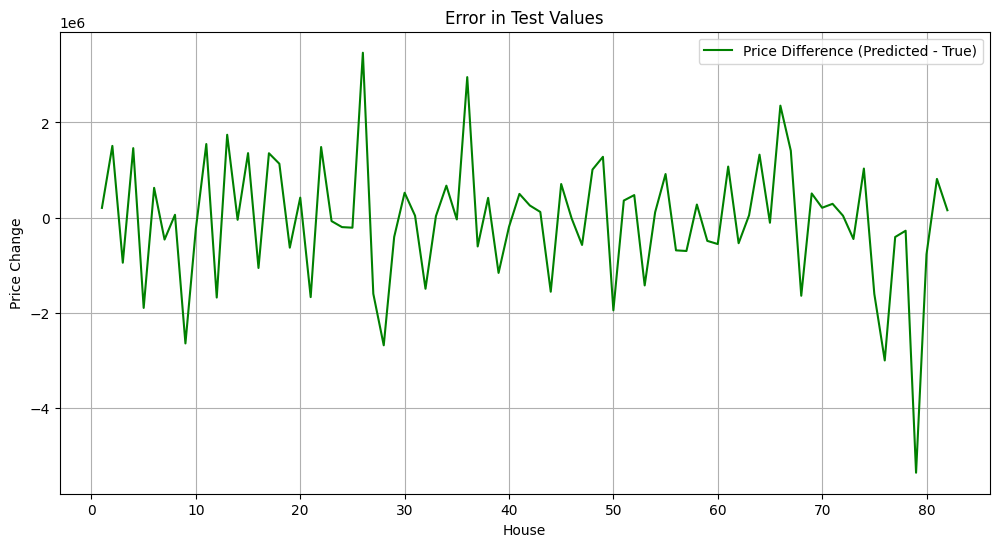

In [15]:
plt.figure(figsize=(12, 6))
plt.title("Error in Test Values")
plt.xlabel("House")
plt.ylabel("Price Change")

plt.plot(testRange, testChange, label="Price Difference (Predicted - True)",
             color="green")

plt.legend(loc="best")
plt.grid(True)
plt.show()